# Example 1: Query a table with SQL and magic commands

In [3]:
# Running this code will query a table in BigQuery and download
# the results to a Pandas DataFrame named `results`.
# Learn more here: https://cloud.google.com/bigquery/docs/visualize-jupyter

%%bigquery results --project teak-optics-360006
SELECT * FROM `teak-optics-360006.transactions.orders` #this table name was set based on the table you chose to query

Query is running:   0%|          |

Downloading:   0%|          |

In [4]:
# You can view the resulting Pandas DataFrame and work with using the Pandas library.
# https://pandas.pydata.org/docs/getting_started/index.html#getting-started
results

,id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
0,4617,1411,2014-02-28 19:57:27+00:00,1,138,0,139,4.990000000,1033.620000000,0E-9,1038.610000000
1,4615,1411,2013-12-30 21:46:00+00:00,150,645,0,795,748.500000000,4831.050000000,0E-9,5579.550000000
2,4680,1441,2015-02-13 04:36:33+00:00,31,438,0,469,154.690000000,3280.620000000,0E-9,3435.310000000
3,4875,1601,2015-03-01 18:04:25+00:00,9,54,0,63,44.910000000,404.460000000,0E-9,449.370000000
4,4029,4271,2015-06-10 08:39:58+00:00,480,1032,0,1512,2395.200000000,7729.680000000,0E-9,10124.880000000
...,...,...,...,...,...,...,...,...,...,...,...
6907,1881,2411,2015-04-01 02:33:49+00:00,495,33,49,577,2470.050000000,247.170000000,397.880000000,3115.100000000
6908,4459,1251,2014-03-08 06:36:38+00:00,495,673,186,1354,2470.050000000,5040.770000000,1510.320000000,9021.140000000
6909,6672,4201,2016-05-25 11:44:40+00:00,495,615,230,1340,2470.050000000,4606.350000000,1867.600000000,8944.000000000
6910,6697,4211,2015-11-22 12:26:56+00:00,495,584,230,1309,2470.050000000,4374.160000000,1867.600000000,8711.810000000


# Example 2: Query a table with BigQuery DataFrames

In [5]:
# With BigQuery DataFrames, you can use many familiar Pandas methods, but the
# processing happens BigQuery rather than the runtime, allowing you to work with larger
# DataFrames that would otherwise not fit in the runtime memory.
# Learn more here: https://cloud.google.com/python/docs/reference/bigframes/latest

import bigframes.pandas as bf

bf.options.bigquery.location = "US" #this variable is set based on the dataset you chose to query
bf.options.bigquery.project = "teak-optics-360006" #this variable is set based on the dataset you chose to query

In [6]:
df = bf.read_gbq("teak-optics-360006.transactions.orders") #this variable is set based on the dataset you chose to query

In [7]:
# BigFrames can work with tables that are too large to fit in the notebook memory.
# Look at the first 20 rows.
df.head(20)

,id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
0,3696,3991,2016-05-24 09:27:56+00:00,462,15,6,483,2305.380000000,112.350000000,48.720000000,2466.450000000
1,775,1531,2016-11-03 11:33:38+00:00,516,11,15,542,2574.840000000,82.390000000,121.800000000,2779.030000000
2,4733,1501,2015-01-30 04:56:18+00:00,22,502,0,524,109.780000000,3759.980000000,0E-9,3869.760000000
3,5038,1831,2016-11-19 00:12:14+00:00,80,512,283,875,399.200000000,3834.880000000,2297.960000000,6532.040000000
4,1069,1741,2015-11-14 13:18:09+00:00,491,3,16,510,2450.090000000,22.470000000,129.920000000,2602.480000000
5,6322,3551,2016-01-20 19:33:19+00:00,207,88,53,348,1032.930000000,659.120000000,430.360000000,2122.410000000
6,4997,1791,2014-07-04 21:37:26+00:00,0,21,63,84,0E-9,157.290000000,511.560000000,668.850000000
7,4798,1531,2016-11-03 11:35:51+00:00,33,69,0,102,164.670000000,516.810000000,0E-9,681.480000000
8,817,1561,2015-09-24 06:46:08+00:00,280,33,21,334,1397.200000000,247.170000000,170.520000000,1814.890000000
9,1762,2341,2016-08-28 23:33:30+00:00,442,29,22,493,2205.580000000,217.210000000,178.640000000,2601.430000000


<class 'bigframes.dataframe.DataFrame'>


Index: 6912 entries, 0 to 6911
Data columns (total 11 columns):


/usr/local/lib/python3.10/dist-packages/bigframes/core/blocks.py:126: NullIndexPreviewWarning: Creating object with Null Index. Null Index is a preview feature.
  warnings.warn(


  #  Column            Non-Null Count    Dtype
---  ----------------  ----------------  ------------------------------
  0  id                6912 non-null     Int64
  1  account_id        6912 non-null     Int64
  2  occurred_at       6912 non-null     timestamp[us, tz=UTC][pyarrow]
  3  standard_qty      6912 non-null     Int64
  4  gloss_qty         6912 non-null     Int64
  5  poster_qty        6912 non-null     Int64
  6  total             6912 non-null     Int64
  7  standard_amt_usd  6912 non-null     decimal128(38, 9)[pyarrow]
  8  gloss_amt_usd     6912 non-null     decimal128(38, 9)[pyarrow]
  9  poster_amt_usd    6912 non-null     decimal128(38, 9)[pyarrow]
 10  total_amt_usd     6912 non-null     decimal128(38, 9)[pyarrow]
dtypes: Int64(6), decimal128(38, 9)[pyarrow](4), timestamp[us, tz=UTC][pyarrow](1)


memory usage: 884736 bytes


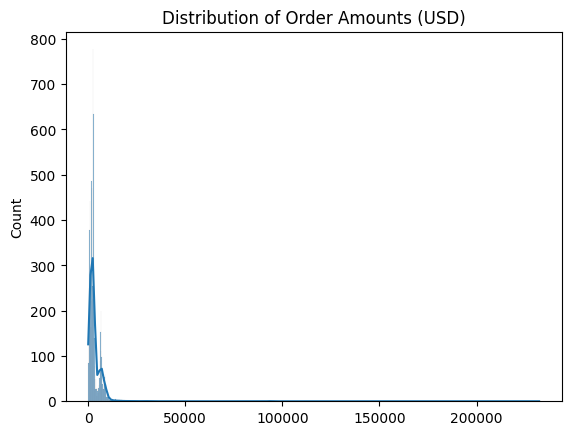

In [8]:
# 01_data_exploration.ipynb

import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt


# Get an overview of the columns and data types
df.info()

# Summary statistics
df.describe()

# Visualizing some of the columns, e.g., distribution of order values
sns.histplot(df['total_amt_usd'], kde=True)
plt.title("Distribution of Order Amounts (USD)")
plt.show()


In [12]:
# 02_data_cleaning.ipynb

import os
import pandas as pd
import numpy as np

# Ensure the 'data' directory exists
output_dir = "data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")


# Handling missing values
df.isnull().sum()

# Dropping rows with null values for simplicity (alternatively, we can fill missing data)
df_cleaned = df.dropna()

# Converting columns to the appropriate data types, if necessary
df_cleaned['occurred_at'] = pd.to_datetime(df_cleaned['occurred_at'])

# Removing duplicates, if any
df_cleaned = df_cleaned.drop_duplicates()

# Cleaning any erroneous values (e.g., negative order amounts)
df_cleaned = df_cleaned[df_cleaned['total_amt_usd'] >= 0]

# Verifying that the cleaning was effective
df_cleaned.info()

# Save the cleaned data to the 'data' directory as a CSV file
output_file = os.path.join(output_dir, "cleaned_orders.csv")
df_cleaned.to_csv(output_file, index=False)

print(f"Data cleaning complete, file saved as {output_file}")


/usr/local/lib/python3.10/dist-packages/bigframes/core/blocks.py:126: NullIndexPreviewWarning: Creating object with Null Index. Null Index is a preview feature.
  warnings.warn(


<class 'bigframes.dataframe.DataFrame'>


Index: 6912 entries, 0 to 6911
Data columns (total 11 columns):


/usr/local/lib/python3.10/dist-packages/bigframes/core/blocks.py:126: NullIndexPreviewWarning: Creating object with Null Index. Null Index is a preview feature.
  warnings.warn(


  #  Column            Non-Null Count    Dtype
---  ----------------  ----------------  ------------------------------
  0  id                6912 non-null     Int64
  1  account_id        6912 non-null     Int64
  2  occurred_at       6912 non-null     timestamp[us, tz=UTC][pyarrow]
  3  standard_qty      6912 non-null     Int64
  4  gloss_qty         6912 non-null     Int64
  5  poster_qty        6912 non-null     Int64
  6  total             6912 non-null     Int64
  7  standard_amt_usd  6912 non-null     decimal128(38, 9)[pyarrow]
  8  gloss_amt_usd     6912 non-null     decimal128(38, 9)[pyarrow]
  9  poster_amt_usd    6912 non-null     decimal128(38, 9)[pyarrow]
 10  total_amt_usd     6912 non-null     decimal128(38, 9)[pyarrow]
dtypes: Int64(6), decimal128(38, 9)[pyarrow](4), timestamp[us, tz=UTC][pyarrow](1)


memory usage: 884736 bytes


Data cleaning complete, file saved as data/cleaned_orders.csv


Total Revenue: $23141511.83
Total Orders: 6912
Average Order Value (AOV): $3348.02
Top 10 Customers by Total Spending:
account_id
4211    382873.30
4151    345618.59
1301    326819.48
1871    300694.79
4111    293861.14
3411    291047.25
2181    281018.36
1561    278575.64
2591    275288.30
1401    272672.84
Name: total_amt_usd, dtype: float64


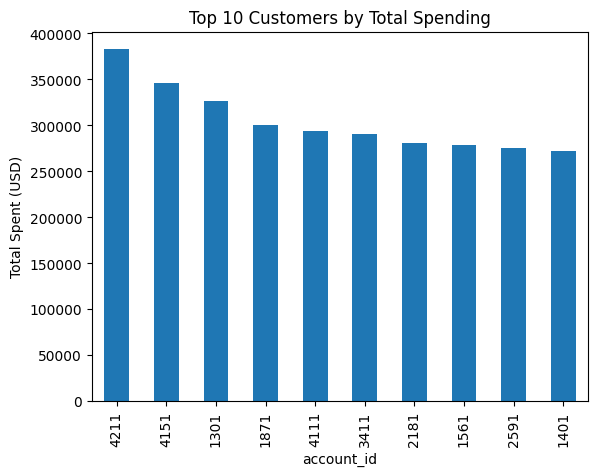

Customer Lifetime Value (CLV) Table:


,total_spent,total_orders,clv
account_id,,,
1001,124014.87,28,4429.1025
1011,2734.59,1,2734.5900
1021,20767.15,10,2076.7150
1031,7474.32,1,7474.3200
1041,15184.46,5,3036.8920


In [16]:
# 03_kpi_analysis.ipynb

import pandas as pd

# Load cleaned data
df_orders = pd.read_csv("data/cleaned_orders.csv")

# Calculate total revenue
total_revenue = df_orders['total_amt_usd'].sum()
print(f"Total Revenue: ${total_revenue}")

# Calculate total number of orders
total_orders = df_orders['id'].nunique()
print(f"Total Orders: {total_orders}")

# Calculate average order value (AOV)
aov = total_revenue / total_orders
print(f"Average Order Value (AOV): ${aov:.2f}")

# Calculate top customers by total spending
top_customers = df_orders.groupby('account_id')['total_amt_usd'].sum().nlargest(10)
print("Top 10 Customers by Total Spending:")
print(top_customers)

# Visualization: Bar plot of top customers
top_customers.plot(kind='bar', title='Top 10 Customers by Total Spending', ylabel='Total Spent (USD)')
plt.show()

# Calculate customer lifetime value (CLV) for each customer
df_clv = df_orders.groupby('account_id').agg(
    total_spent=pd.NamedAgg(column='total_amt_usd', aggfunc='sum'),
    total_orders=pd.NamedAgg(column='id', aggfunc='count')
)
df_clv['clv'] = df_clv['total_spent'] / df_clv['total_orders']

print("Customer Lifetime Value (CLV) Table:")
df_clv.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


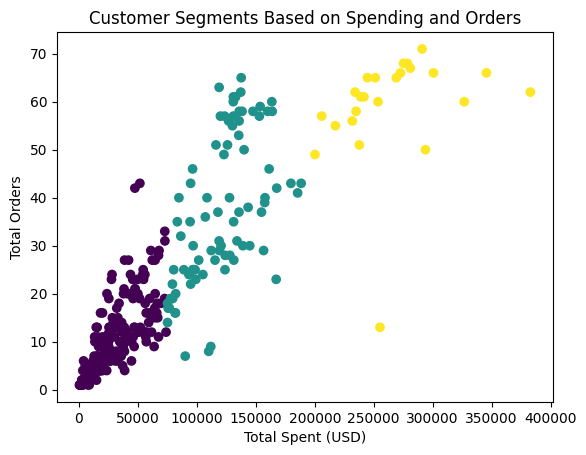

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmrmp3rd/65z5caq9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgmrmp3rd/qyzlth3h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27125', 'data', 'file=/tmp/tmpgmrmp3rd/65z5caq9.json', 'init=/tmp/tmpgmrmp3rd/qyzlth3h.json', 'output', 'file=/tmp/tmpgmrmp3rd/prophet_modeladul5iog/prophet_model-20240905214254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:42:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:42:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray.

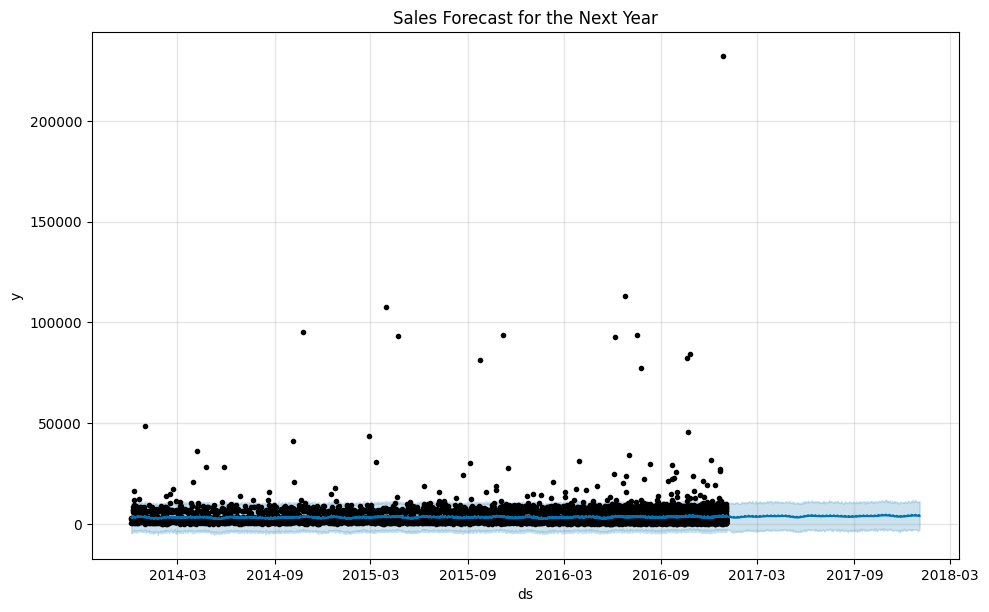

In [19]:
# 04_advanced_analysis.ipynb

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from prophet import Prophet

# Load cleaned data
df_orders = pd.read_csv("data/cleaned_orders.csv")

# Segmentation: Customer Segmentation using K-Means Clustering
df_customer = df_orders.groupby('account_id').agg(
    total_spent=pd.NamedAgg(column='total_amt_usd', aggfunc='sum'),
    total_orders=pd.NamedAgg(column='id', aggfunc='count')
).reset_index()

# Apply K-Means Clustering to segment customers
kmeans = KMeans(n_clusters=3, random_state=42)
df_customer['segment'] = kmeans.fit_predict(df_customer[['total_spent', 'total_orders']])

# Visualizing customer segments
plt.scatter(df_customer['total_spent'], df_customer['total_orders'], c=df_customer['segment'], cmap='viridis')
plt.xlabel('Total Spent (USD)')
plt.ylabel('Total Orders')
plt.title('Customer Segments Based on Spending and Orders')
plt.show()

# Time Series Forecasting: Predict future sales using historical data

# Prepare data for Prophet model
df_forecast = df_orders.groupby('occurred_at')['total_amt_usd'].sum().reset_index()
df_forecast.columns = ['ds', 'y']

# Remove timezone from the 'ds' column, if any
df_forecast['ds'] = pd.to_datetime(df_forecast['ds']).dt.tz_localize(None)

# Initialize Prophet model
model = Prophet()
model.fit(df_forecast)

# Make future predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Sales Forecast for the Next Year')
plt.show()
